In [21]:
import geopandas as gdp
import pandas as pd
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os
import matplotlib.pyplot as plt
from glob import glob
from sklearn import cluster
from osgeo import gdal

In [23]:
landsat_path = glob("LC08_L1TP_090083_20191215_20191226_01_T1_NEW/RT_LC08_L1TP_090083_20191215_20191226_01_T1_B*.TIF")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path)

print(len(landsat_path))

7


In [7]:

# paths    
    
landsat_path = glob("LC08_L1TP_091086_20191222_20200110_01_T1/LC08_L1TP_091086_20191222_20200110_01_T1_B*_Refl.TIF")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path)

print(len(landsat_path))

7


In [24]:
array_stack[0].dtype

dtype('float32')

In [28]:
landsat_path

['LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_LC08_L1TP_090083_20191215_20191226_01_T1_B1.TIF',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_LC08_L1TP_090083_20191215_20191226_01_T1_B2.TIF',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_LC08_L1TP_090083_20191215_20191226_01_T1_B3.TIF',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_LC08_L1TP_090083_20191215_20191226_01_T1_B4.TIF',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_LC08_L1TP_090083_20191215_20191226_01_T1_B5.TIF',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_LC08_L1TP_090083_20191215_20191226_01_T1_B6.TIF',
 'LC08_L1TP_090083_20191215_20191226_01_T1_NEW\\RT_LC08_L1TP_090083_20191215_20191226_01_T1_B7.TIF']

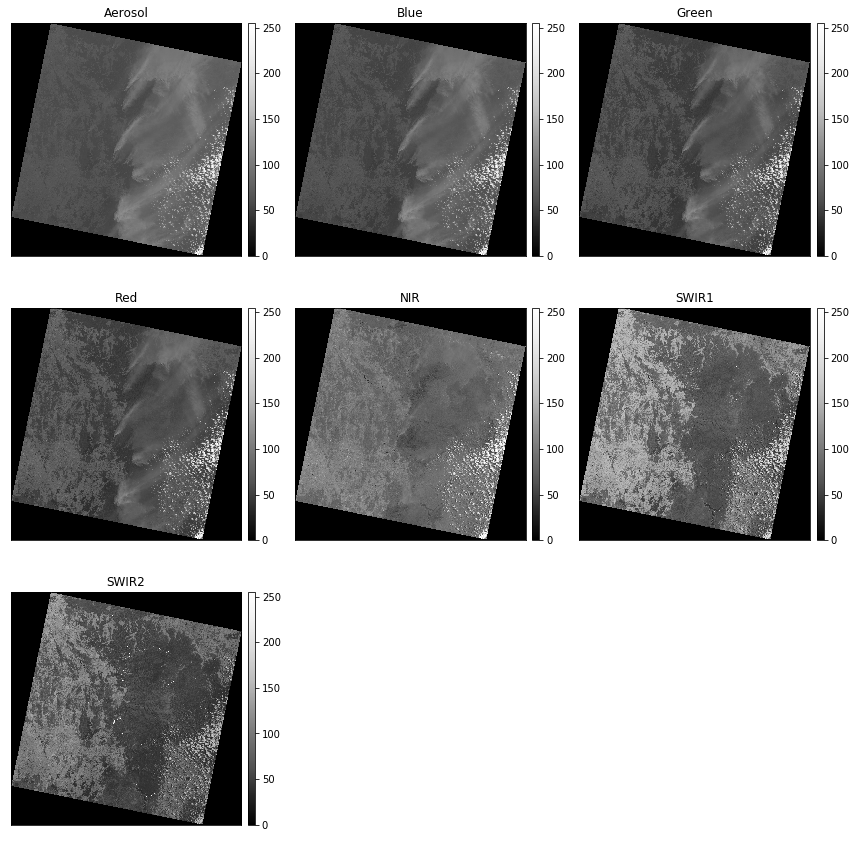

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB36985588>,
      dtype=object)

In [29]:
title = ['Aerosol' , 'Blue' , 'Green' , 'Red' , 'NIR' , 'SWIR1' , 'SWIR2']


ep.plot_bands(array_stack,
              title=title)

In [92]:
band6= gdal.Open("LC08_L1TP_091086_20191222_20200110_01_T1/LC08_L1TP_091086_20191222_20200110_01_T1_B7_Refl.TIF")

img = band6.ReadAsArray()

X = img.reshape((-1, 1))
X

array([[-0.1010101],
       [-0.1010101],
       [-0.1010101],
       ...,
       [-0.1010101],
       [-0.1010101],
       [-0.1010101]], dtype=float32)

In [94]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)

MemoryError: 

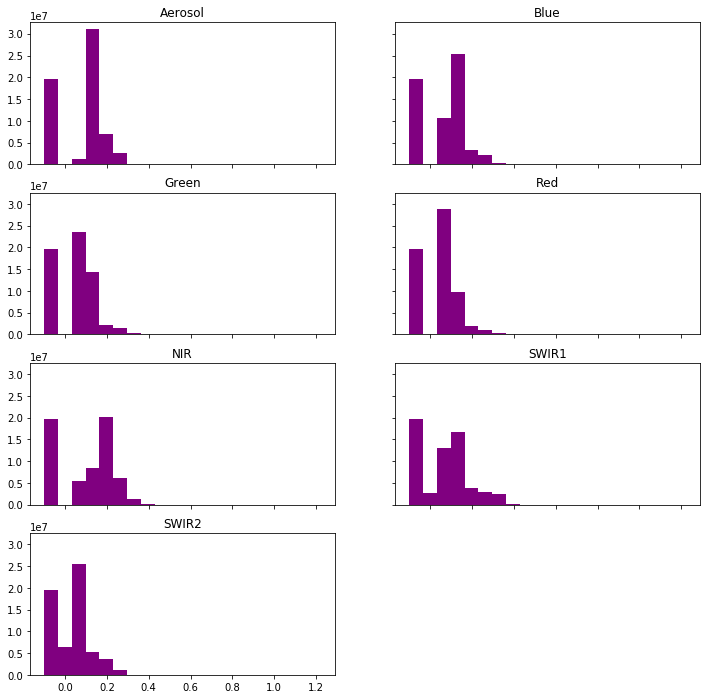

In [54]:
ep.hist(array_stack,
        title=title,)
plt.show()

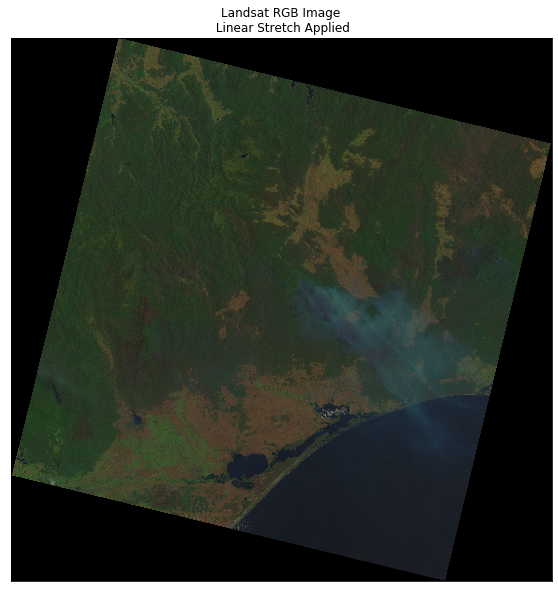

In [55]:
# Adjust the amount of linear stretch to futher brighten the image

ep.plot_rgb(array_stack,
            rgb=[5, 4, 2],
            title="Landsat RGB Image\n Linear Stretch Applied")
plt.show()

In [56]:
ndvi = es.normalized_diff(array_stack[4], array_stack[3])


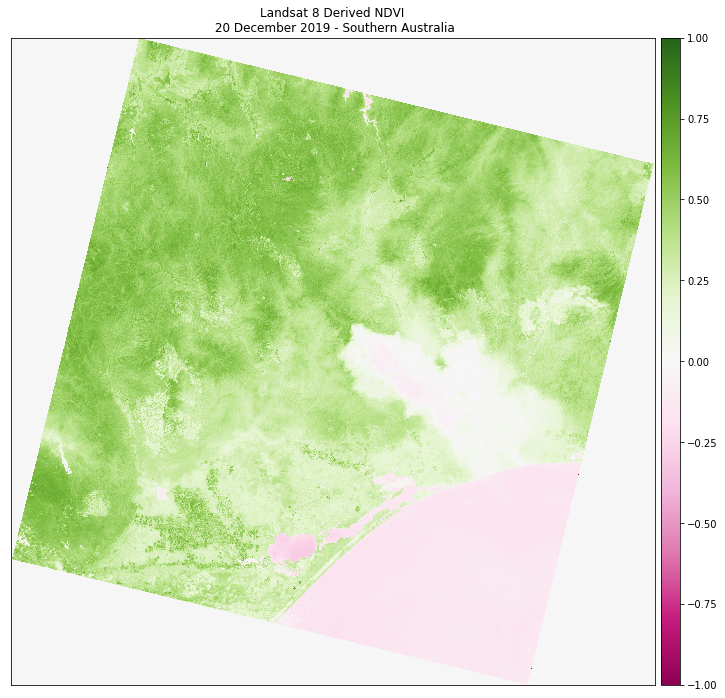

In [57]:
ep.plot_bands(ndvi, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Landsat 8 Derived NDVI\n 20 December 2019 - Southern Australia")
plt.show()

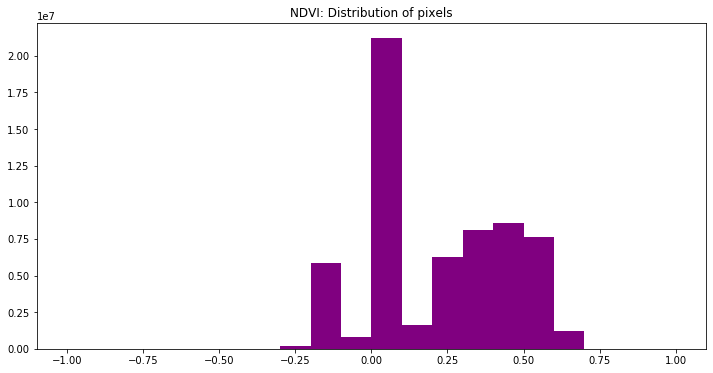

In [58]:
ep.hist(ndvi,
        figsize=(12, 6),
        title= "NDVI: Distribution of pixels",
        hist_range= (-1,1))

plt.show()

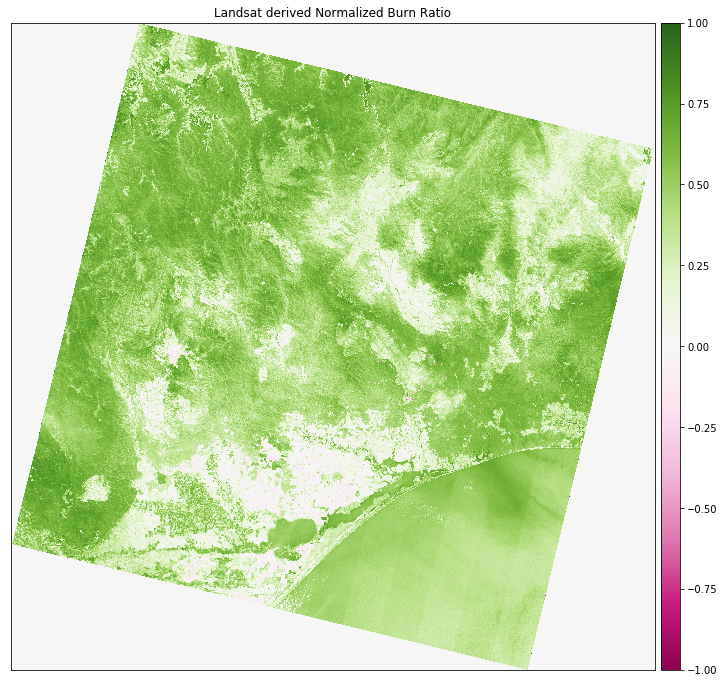

In [59]:
# Calculate NBR & plot
nbr = es.normalized_diff(array_stack[4], array_stack[6])

fig, ax = plt.subplots(figsize=(12, 12))

ep.plot_bands(nbr,
              cmap='PiYG',
              vmin=-1,vmax=1,
              title="Landsat derived Normalized Burn Ratio",
              ax=ax,
              scale=False)

# fire_bound_utmz13.plot(ax=ax, color='None',
#                        edgecolor='black', linewidth=2)
plt.show()

In [60]:
#{ (Ratio of Band 7 to 5 > 2.5) AND (Reflectance difference of band 7 minus band 5 > 0.3) AND (reflectance band 7 greater than 0.5) }

ratio_7_5 = array_stack[6] / array_stack[4]

# AND

diff_7_5 = array_stack[6] - array_stack[4]

#AND

array_stack[6] = array_stack[6]


In [61]:
ratio_7_5.shape

(7861, 7821)

In [62]:
array_stack[6].dtype

dtype('float32')

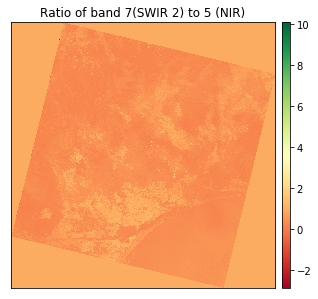

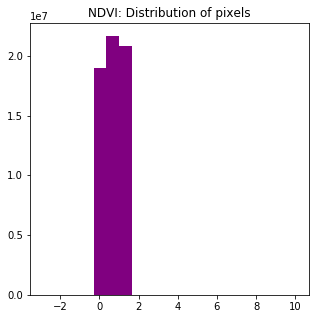

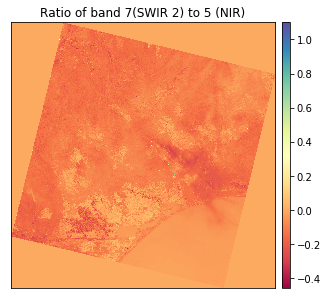

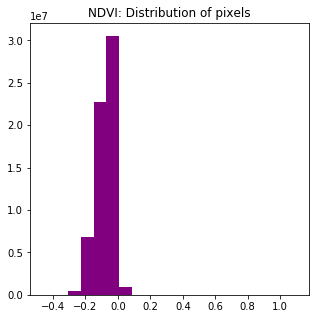

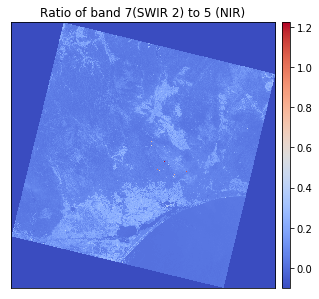

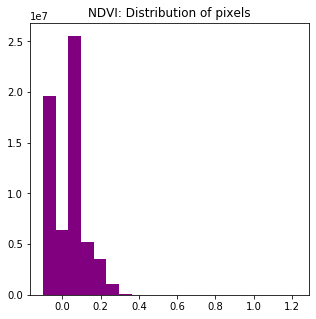

In [63]:
# Algorithm; Ideally, this mimicks those that have utilized certain bands 

# Graphs of  band 7 reflectance over 0.5
ep.plot_bands(ratio_7_5,
              figsize=(5,5),
              cmap='RdYlGn',
              scale=False,
              title="Ratio of band 7(SWIR 2) to 5 (NIR)")
plt.show()

ep.hist(ratio_7_5,
        figsize=(5,5),
        title= "NDVI: Distribution of pixels")

plt.show()

# Graphs of difference between 7 and 5
ep.plot_bands(diff_7_5,
              figsize=(5,5),
              cmap='Spectral',
              scale=False,
              title="Ratio of band 7(SWIR 2) to 5 (NIR)")
plt.show()


ep.hist(diff_7_5,
        figsize=(5,5),
        title= "NDVI: Distribution of pixels")

plt.show()

# Graphs of ratio band 7 to band 5
ep.plot_bands(array_stack[6],
              figsize=(5,5),
              cmap='coolwarm',
              scale=False,
              title="Ratio of band 7(SWIR 2) to 5 (NIR)")
plt.show()

ep.hist(array_stack[6] ,
        figsize=(5,5),
        title= "NDVI: Distribution of pixels")

plt.show()

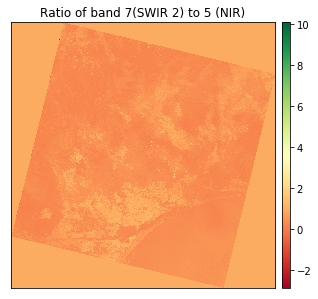

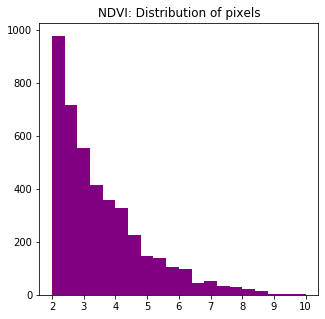

In [64]:
# Ratio of Band 7 to 5 
ep.plot_bands(ratio_7_5,
              figsize=(5,5),
              cmap='RdYlGn',
              scale=False,
              title="Ratio of band 7(SWIR 2) to 5 (NIR)")
plt.show()

ep.hist(ratio_7_5,
        figsize=(5,5),
        title= "NDVI: Distribution of pixels",
       hist_range= (2.0,10.0))

plt.show()

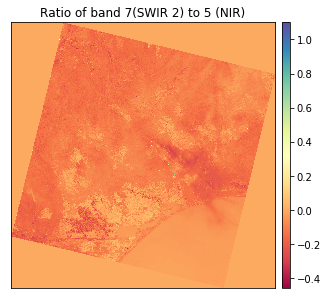

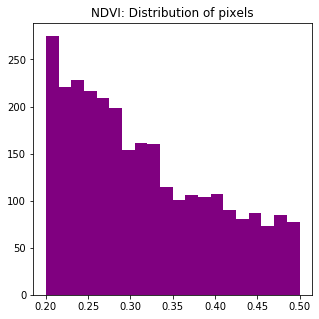

In [65]:
# Graphs of difference between 7 and 5
ep.plot_bands(diff_7_5,
              figsize=(5,5),
              cmap='Spectral',
              scale=False,
              title="Ratio of band 7(SWIR 2) to 5 (NIR)")
plt.show()


ep.hist(diff_7_5,
        figsize=(5,5),
        title= "NDVI: Distribution of pixels",
       hist_range=(0.2, 0.5))

plt.show()

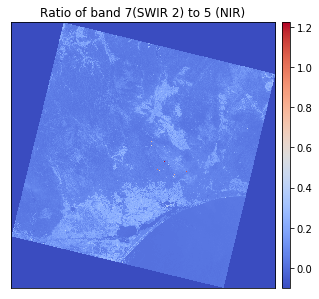

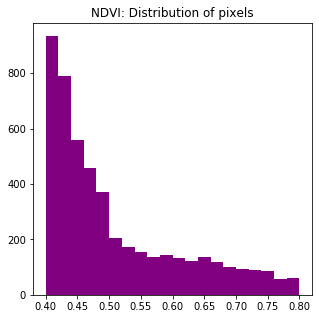

In [66]:
# Band 7

array_stack[6] = array_stack[6]
ep.plot_bands(array_stack[6],
              figsize=(5,5),
              cmap='coolwarm',
              scale=False,
              title="Ratio of band 7(SWIR 2) to 5 (NIR)")
plt.show()
ep.hist(array_stack[6],
        figsize=(5,5),
        title= "NDVI: Distribution of pixels",
       hist_range=(0.4, 0.8))

plt.show()

In [67]:
# looking through all and putthing images in chosen pixels

#{ (Ratio of Band 7 to 5 > 2.5) AND (Reflectance difference of band 7 minus band 5 > 0.3) AND (reflectance band 7 greater than 0.5) }

#ratio_7_5 = array_stack[6] / array_stack[4]

# AND

#diff_7_5 = array_stack[6] - array_stack[4]

#AND

#array_stack[6] = array_stack[6]

In [3]:
# paths    
    
landsat_path = glob("LC08_L1TP_090083_20191215_20191226_01_T1/LC08_L1TP_090083_20191215_20191226_01_T1_B*_Refl.TIF")
landsat_path.sort()
print(landsat_path)
array_stack, meta_data = es.stack(landsat_path)

print(len(landsat_path))

['LC08_L1TP_090083_20191215_20191226_01_T1\\LC08_L1TP_090083_20191215_20191226_01_T1_B1_Refl.TIF', 'LC08_L1TP_090083_20191215_20191226_01_T1\\LC08_L1TP_090083_20191215_20191226_01_T1_B2_Refl.TIF', 'LC08_L1TP_090083_20191215_20191226_01_T1\\LC08_L1TP_090083_20191215_20191226_01_T1_B3_Refl.TIF', 'LC08_L1TP_090083_20191215_20191226_01_T1\\LC08_L1TP_090083_20191215_20191226_01_T1_B4_Refl.TIF', 'LC08_L1TP_090083_20191215_20191226_01_T1\\LC08_L1TP_090083_20191215_20191226_01_T1_B5_Refl.TIF', 'LC08_L1TP_090083_20191215_20191226_01_T1\\LC08_L1TP_090083_20191215_20191226_01_T1_B6_Refl.TIF', 'LC08_L1TP_090083_20191215_20191226_01_T1\\LC08_L1TP_090083_20191215_20191226_01_T1_B7_Refl.TIF']
7


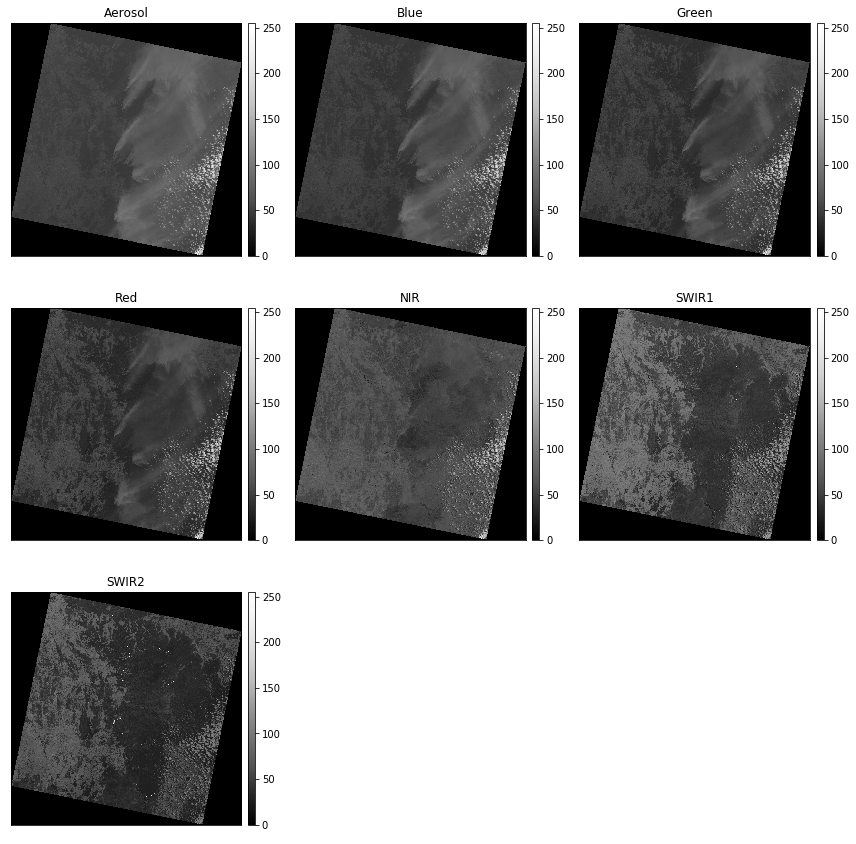

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB2F3C37C8>,
      dtype=object)

In [4]:
title = ['Aerosol' , 'Blue' , 'Green' , 'Red' , 'NIR' , 'SWIR1' , 'SWIR2']


ep.plot_bands(array_stack,
              title=title)

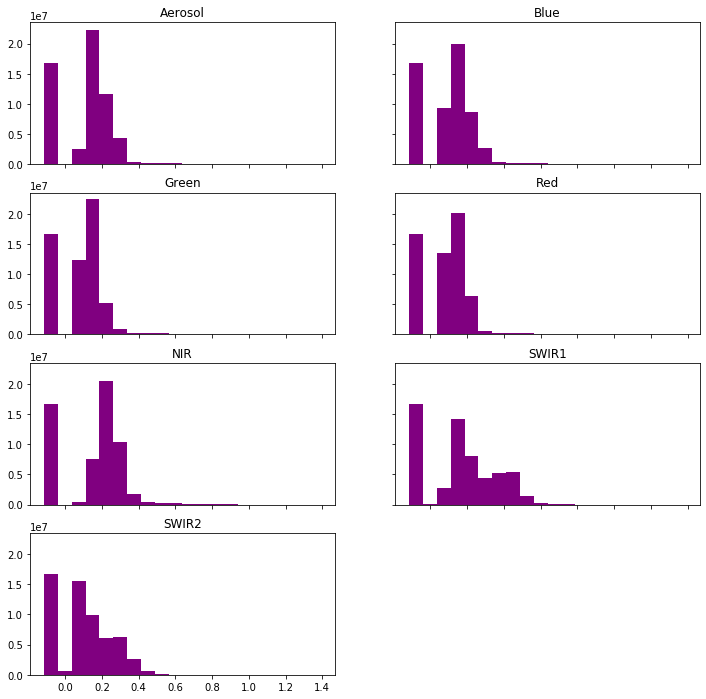

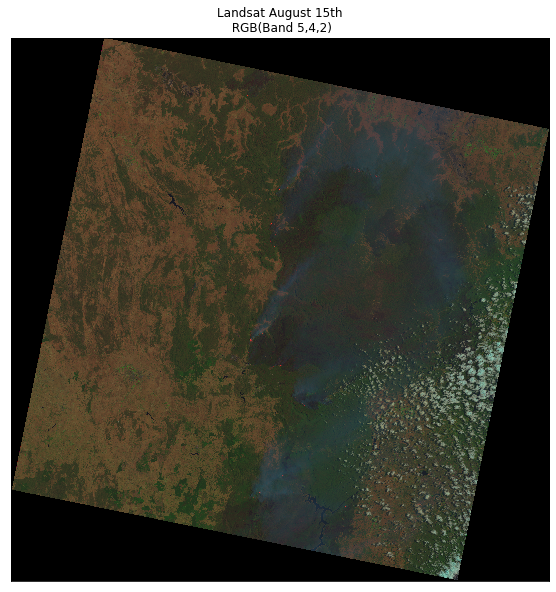

In [5]:
ep.hist(array_stack,
        title=title,)
plt.show()

# Adjust the amount of linear stretch to futher brighten the image

ep.plot_rgb(array_stack,
            rgb=[5, 4, 2],
            title="Landsat August 15th\n RGB(Band 5,4,2)")
plt.show()

In [ ]:
ndvi = es.normalized_diff(array_stack[4], array_stack[3])
ep.plot_bands(ndvi, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Landsat 8 Derived NDVI\n 20 December 2019 - Southern Australia")
plt.show()

In [ ]:
# Calculate NBR & plot
nbr = es.normalized_diff(array_stack[4], array_stack[6])

fig, ax = plt.subplots(figsize=(12, 12))

ep.plot_bands(nbr,
              cmap='PiYG',
              vmin=-1,vmax=1,
              title="Landsat derived Normalized Burn Ratio",
              ax=ax,
              scale=False)

# fire_bound_utmz13.plot(ax=ax, color='None',
#                        edgecolor='black', linewidth=2)
plt.show()

In [ ]:
array_stack    

# Decision Tree Development
The following are parameters that needs to be implemented for decision tree development. This will eventually help us create more rigid models such as random forest modelling.

Parameters are the following down below:

(Ratio of Band 7 to 5 > 2.5) <b>AND</b>
(Reflectance difference of band 7 minus band 5 > 0.3)  <b>AND</b>
(reflectance band 7 greater than 0.5)




In [ ]:
#labels =["Fire, Non-Fire"]

def splitData(features):
    
    titanic_predictors = titanic[features].values
    titanic_labels = titanic["Survived"].values

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(titanic_predictors, titanic_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest